In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import os
import jax
import jax.numpy as jnp
import visualization
from utils import results, experiments, settings
import global_settings

In [2]:
selection = "sinusoidal"

if selection == "sinusoidal":
    path = "/home/gw/data/experiments/master_thesis/results/6fad5c77c6e4fcd72601720d57bf25fb.tar.gz"
elif selection == "izmailov":
    path = "/home/gw/data/experiments/master_thesis/results/c7a0f43090df6ada8839956d7b320aec.tar.gz"
elif selection == "regression2d":
    path = "/home/gw/data/experiments/master_thesis/results/c6835cefcab68b58b6f07158f1137c83.tar.gz"
else:
    pass

result = results.ResultSample.load_from_file(path)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()

normalized probabilities: [0.5665243  0.3504857  0.08298998]


samples_parameters_fs.shape (1274, 22)


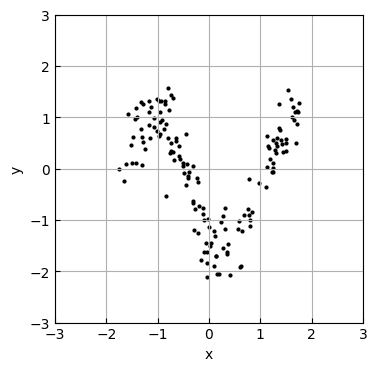

In [3]:
rng_key, rng_key_ = jax.random.split(jax.random.PRNGKey(0))
samples_parameters_fs = jax.random.permutation(rng_key_, result.samples["parameters"])
print("samples_parameters_fs.shape", samples_parameters_fs.shape)

n = 2**10
if len(experiment._dataset.conditional_indices) > 1:
    n = 2**4

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=0.08,
            epistemic=False
        )
    )
)
figure.plot(
    dataset=experiment._dataset,
    transformation=experiment._model_transformation.apply_from_vector,
    parameters_list=None,
    std=result.samples["std"].mean()
)

In [4]:
output_path = os.path.join(global_settings.PATH_THESIS, "figures")
name = "dataset_{}.pdf".format(selection)
figure._figure.savefig(os.path.join(output_path, name), bbox_inches="tight")